#### Your project is to:

Predict conversion rate

Come up with recommendations for the product team and the marketing team to improve conversion rate

#### My Approach for data process

In [75]:
conversion_data <- read.csv(file="conversion_data.csv",head=TRUE,sep=",")

In [76]:
head(conversion_data)

country,age,new_user,source,total_pages_visited,converted
UK,25,1,Ads,1,0
US,23,1,Seo,5,0
US,28,1,Seo,4,0
China,39,1,Seo,5,0
US,30,1,Seo,6,0
US,31,0,Seo,1,0


In [77]:
conversion_data$conver_rate <- mean(conversion_data$converted)
conversion_data <- subset(conversion_data,age<80)
summary(conversion_data)

    country            age           new_user         source      
 China  : 76602   Min.   :17.00   Min.   :0.0000   Ads   : 88739  
 Germany: 13055   1st Qu.:24.00   1st Qu.:0.0000   Direct: 72420  
 UK     : 48449   Median :30.00   Median :1.0000   Seo   :155039  
 US     :178092   Mean   :30.57   Mean   :0.6855                  
                  3rd Qu.:36.00   3rd Qu.:1.0000                  
                  Max.   :79.00   Max.   :1.0000                  
 total_pages_visited   converted        conver_rate     
 Min.   : 1.000      Min.   :0.00000   Min.   :0.03226  
 1st Qu.: 2.000      1st Qu.:0.00000   1st Qu.:0.03226  
 Median : 4.000      Median :0.00000   Median :0.03226  
 Mean   : 4.873      Mean   :0.03225   Mean   :0.03226  
 3rd Qu.: 7.000      3rd Qu.:0.00000   3rd Qu.:0.03226  
 Max.   :29.000      Max.   :1.00000   Max.   :0.03226  

In [78]:
library(Hmisc,warn.conflicts = FALSE)

In [79]:
describe(conversion_data) 

conversion_data 

 7  Variables      316198  Observations
--------------------------------------------------------------------------------
country 
       n  missing distinct 
  316198        0        4 
                                          
Value        China Germany      UK      US
Frequency    76602   13055   48449  178092
Proportion   0.242   0.041   0.153   0.563
--------------------------------------------------------------------------------
age 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
  316198        0       58    0.999    30.57    9.336       18       20 
     .25      .50      .75      .90      .95 
      24       30       36       42       45 

lowest : 17 18 19 20 21, highest: 70 72 73 77 79
--------------------------------------------------------------------------------
new_user 
       n  missing distinct     Info      Sum     Mean      Gmd 
  316198        0        2    0.647   216744   0.6855   0.4312 

------------------------------

In [80]:
sub_numeric <- subset(conversion_data,select=c("converted","total_pages_visited","new_user","age"))

In [81]:
cor(sub_numeric)

,converted,total_pages_visited,new_user,age
converted,1.00000000,0.52897471,-0.15233823,-0.08919875
total_pages_visited,0.52897471,1.00000000,-0.08252221,-0.04609336
new_user,-0.15233823,-0.08252221,1.00000000,0.01244456
age,-0.08919875,-0.04609336,0.01244456,1.00000000


In [82]:
library(MASS)
sub_cat = table(conversion_data$converted, conversion_data$source)
head(sub_cat)

   
       Ads Direct    Seo
  0  85680  70380 149940
  1   3059   2040   5099

In [83]:
chisq.test(sub_cat)


	Pearson's Chi-squared test

data:  sub_cat
X-squared = 54.704, df = 2, p-value = 1.322e-12


In [84]:
sub_cat = table(conversion_data$converted, conversion_data$country)
head(sub_cat)
chisq.test(sub_cat)

   
     China Germany     UK     US
  0  76500   12240  45900 171360
  1    102     815   2549   6732


	Pearson's Chi-squared test

data:  sub_cat
X-squared = 3546.5, df = 3, p-value < 2.2e-16


#### Data process from Book

In [85]:
library(dplyr,warn.conflicts = FALSE)
library(rpart,warn.conflicts = FALSE)
library(ggplot2,warn.conflicts = FALSE)
library(randomForest,warn.conflicts = FALSE)

In [86]:
str(conversion_data)

'data.frame':	316198 obs. of  7 variables:
 $ country            : Factor w/ 4 levels "China","Germany",..: 3 4 4 1 4 4 1 4 3 4 ...
 $ age                : int  25 23 28 39 30 31 27 23 29 25 ...
 $ new_user           : int  1 1 1 1 1 0 1 0 0 0 ...
 $ source             : Factor w/ 3 levels "Ads","Direct",..: 1 3 3 3 3 3 3 1 2 1 ...
 $ total_pages_visited: int  1 5 4 5 6 1 4 4 4 2 ...
 $ converted          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ conver_rate        : num  0.0323 0.0323 0.0323 0.0323 0.0323 ...


In [87]:
sort(unique(conversion_data$age),decreasing=TRUE)

[1] 79 77 73 72 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50
[26] 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26 25
[51] 24 23 22 21 20 19 18 17

In [88]:
head(conversion_data)

country,age,new_user,source,total_pages_visited,converted,conver_rate
UK,25,1,Ads,1,0,0.03225806
US,23,1,Seo,5,0,0.03225806
US,28,1,Seo,4,0,0.03225806
China,39,1,Seo,5,0,0.03225806
US,30,1,Seo,6,0,0.03225806
US,31,0,Seo,1,0,0.03225806


country,conversion_rate
China,0.001331558
Germany,0.062428188
UK,0.052612025
US,0.037800687


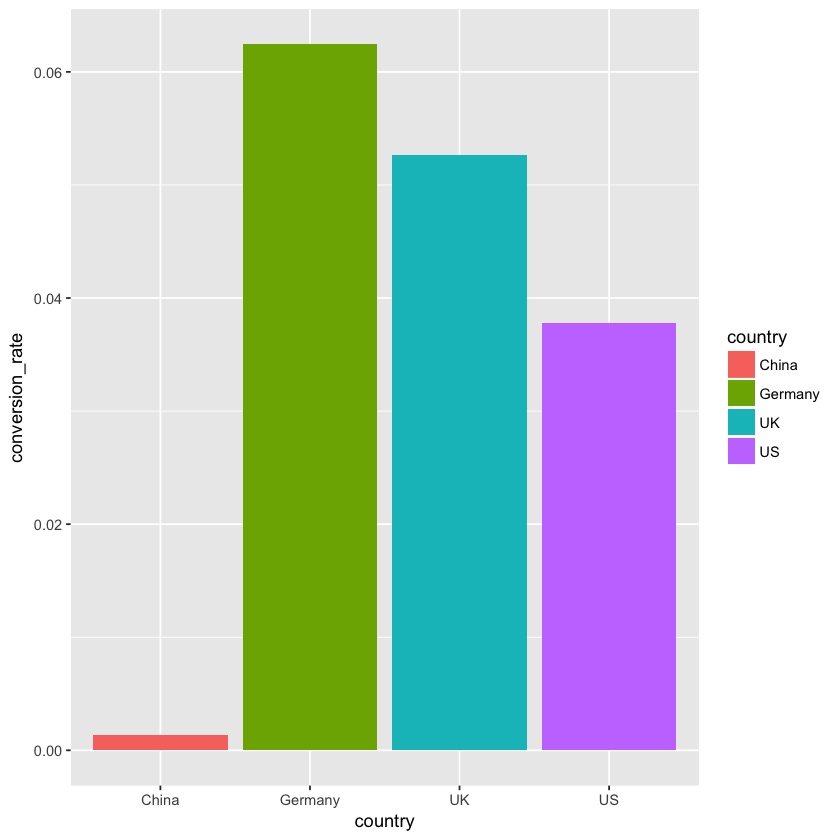

In [89]:
data_country=conversion_data%>%
            group_by(country)%>%
summarise(conversion_rate = mean(converted))
data_country
ggplot(data=data_country,aes(x=country,y=conversion_rate)) + geom_bar(stat='identity',aes(fill=country))

In [90]:
data_source=conversion_data%>%
            group_by(source)%>%
summarise(conversion_rate = mean(converted))
data_source
data_user=conversion_data%>%
            group_by(new_user)%>%
summarise(conversion_rate = mean(converted))
data_user

#ggplot(data=data_source,aes(x=source,y=conversion_rate)) + geom_bar(stat='identity',aes(fill=country))

source,conversion_rate
Ads,0.03447188
Direct,0.02816901
Seo,0.03288850


new_user,conversion_rate
0,0.07198303
1,0.01402115


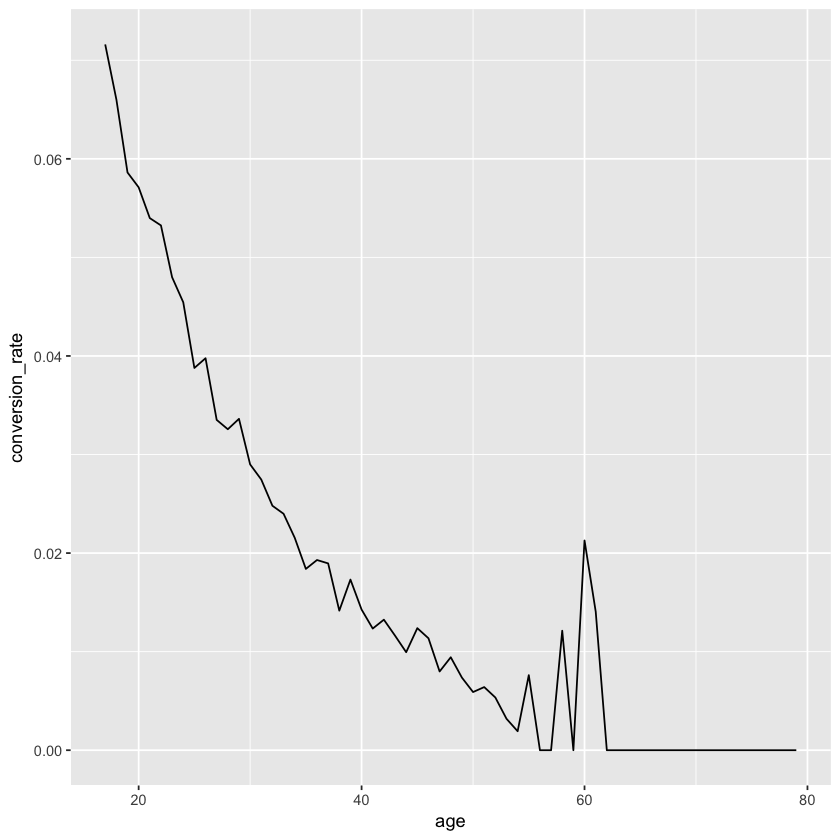

In [91]:
data_age=conversion_data%>%
            group_by(age)%>%
summarise(conversion_rate = mean(converted))

qplot(age, conversion_rate, data=data_age, geom="line")

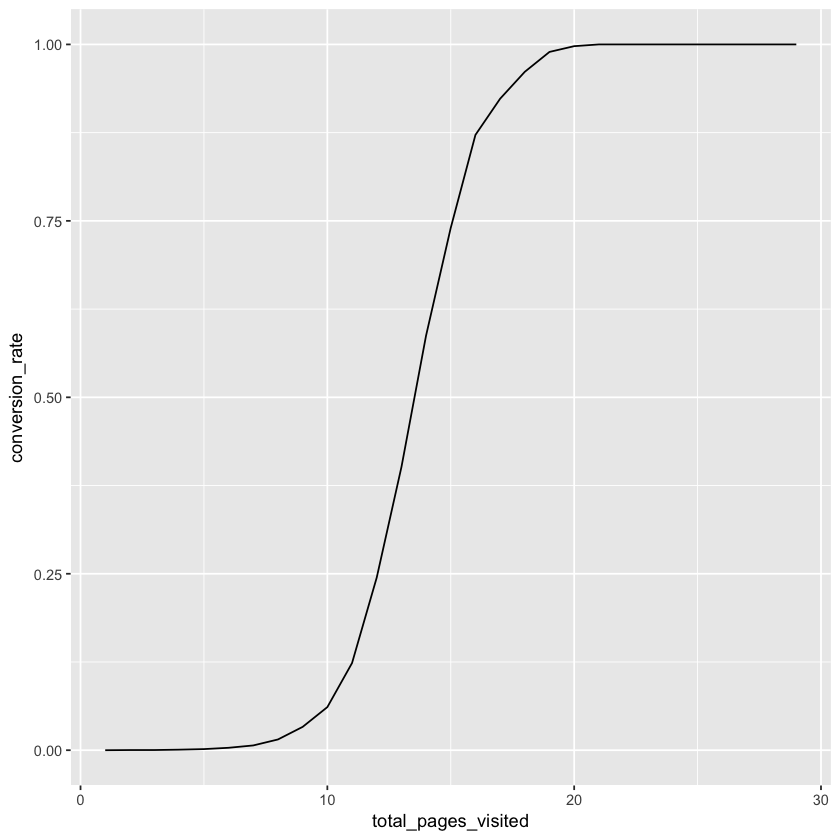

In [92]:
data_pages = conversion_data %>%
group_by(total_pages_visited) %>%
summarise(conversion_rate = mean(converted))
qplot(total_pages_visited, conversion_rate, data=data_pages, geom="line")

In [93]:
head(data_country)

country,conversion_rate
China,0.001331558
Germany,0.062428188
UK,0.052612025
US,0.037800687


In [94]:
conversion_data$converted = as.factor(conversion_data$converted)

In [95]:
conversion_data$new_user = as.factor(conversion_data$new_user)

In [96]:
levels(conversion_data$country)[levels(conversion_data$country) == "Germany"] = "DE"
levels(conversion_data$country)[levels(conversion_data$country) == "China"] = "CN"

In [97]:
#conversion_data$source = as.factor(conversion_data$source)

In [98]:
head(conversion_data)

country,age,new_user,source,total_pages_visited,converted,conver_rate
UK,25,1,Ads,1,0,0.03225806
US,23,1,Seo,5,0,0.03225806
US,28,1,Seo,4,0,0.03225806
CN,39,1,Seo,5,0,0.03225806
US,30,1,Seo,6,0,0.03225806
US,31,0,Seo,1,0,0.03225806


In [99]:
describe(conversion_data)

conversion_data 

 7  Variables      316198  Observations
--------------------------------------------------------------------------------
country 
       n  missing distinct 
  316198        0        4 
                                      
Value          CN     DE     UK     US
Frequency   76602  13055  48449 178092
Proportion  0.242  0.041  0.153  0.563
--------------------------------------------------------------------------------
age 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
  316198        0       58    0.999    30.57    9.336       18       20 
     .25      .50      .75      .90      .95 
      24       30       36       42       45 

lowest : 17 18 19 20 21, highest: 70 72 73 77 79
--------------------------------------------------------------------------------
new_user 
       n  missing distinct 
  316198        0        2 
                        
Value           0      1
Frequency   99454 216744
Proportion  0.315  0.685
-------------------

In [100]:
conversion_data <- subset(conversion_data,select=c("country","age","new_user","source","total_pages_visited","converted"))
train_sample = sample(nrow(conversion_data), size=nrow(conversion_data)*0.66)
train_data = conversion_data[train_sample,]
test_data = conversion_data[-train_sample,]

In [101]:
head(conversion_data)

country,age,new_user,source,total_pages_visited,converted
UK,25,1,Ads,1,0
US,23,1,Seo,5,0
US,28,1,Seo,4,0
CN,39,1,Seo,5,0
US,30,1,Seo,6,0
US,31,0,Seo,1,0


#### Online Resource & my approach

In [102]:
library(caret,warn.conflict=FALSE)
ctrl <- trainControl(method = "repeatedcv", number = 10, savePredictions = TRUE)

mod_fit <- train(converted~source+country+total_pages_visited+new_user+age,  data=train_data, method="glm", family="binomial",
                 trControl = ctrl, tuneLength = 5)

In [103]:
pred = predict(mod_fit, newdata=test_data)

In [104]:
accuracy <- table(pred, test_data[,"converted"])
sum(diag(accuracy))/sum(accuracy)

[1] 0.9857592

In [105]:
confusionMatrix(data=pred, test_data[,"converted"])

Confusion Matrix and Statistics

          Reference
Prediction      0      1
         0 103601   1093
         1    438   2376
                                         
               Accuracy : 0.9858         
                 95% CI : (0.985, 0.9865)
    No Information Rate : 0.9677         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.7491         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9958         
            Specificity : 0.6849         
         Pos Pred Value : 0.9896         
         Neg Pred Value : 0.8443         
             Prevalence : 0.9677         
         Detection Rate : 0.9637         
   Detection Prevalence : 0.9738         
      Balanced Accuracy : 0.8404         
                                         
       'Positive' Class : 0              
                                         

In [106]:
fit <- glm(converted~source+country+total_pages_visited+new_user+age, data=train_data, family=binomial())

In [107]:
fit


Call:  glm(formula = converted ~ source + country + total_pages_visited + 
    new_user + age, family = binomial(), data = train_data)

Coefficients:
        (Intercept)         sourceDirect            sourceSeo  
          -10.23300             -0.18997             -0.01798  
          countryDE            countryUK            countryUS  
            3.61982              3.49336              3.09362  
total_pages_visited            new_user1                  age  
            0.76474             -1.76847             -0.07473  

Degrees of Freedom: 208689 Total (i.e. Null);  208681 Residual
Null Deviance:	    59460 
Residual Deviance: 16750 	AIC: 16770

In [108]:
summary(fit)


Call:
glm(formula = converted ~ source + country + total_pages_visited + 
    new_user + age, family = binomial(), data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1587  -0.0622  -0.0236  -0.0096   4.4372  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -10.232999   0.179426 -57.032  < 2e-16 ***
sourceDirect         -0.189965   0.060261  -3.152  0.00162 ** 
sourceSeo            -0.017981   0.049349  -0.364  0.71558    
countryDE             3.619820   0.156158  23.181  < 2e-16 ***
countryUK             3.493355   0.140176  24.921  < 2e-16 ***
countryUS             3.093619   0.135421  22.844  < 2e-16 ***
total_pages_visited   0.764738   0.007721  99.046  < 2e-16 ***
new_user1            -1.768470   0.044208 -40.004  < 2e-16 ***
age                  -0.074730   0.002951 -25.327  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial fam

[1] 0.9855225

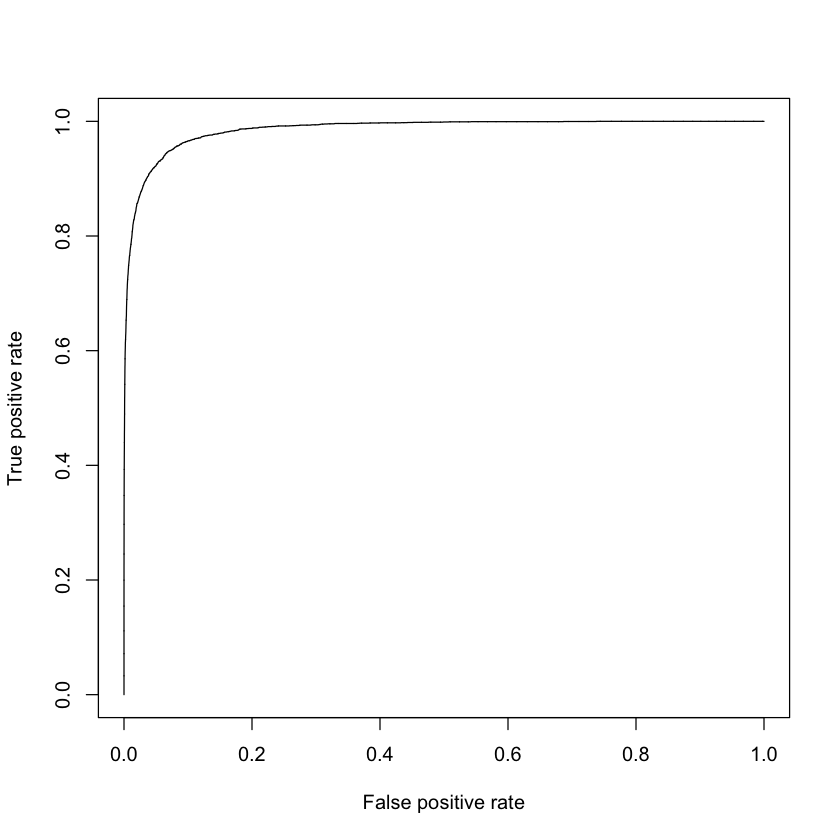

In [109]:
library(ROCR, warn.conflict=FALSE)
# Compute AUC for predicting Class with the model
prob <- predict(fit, newdata=test_data, type="response")
pred <- prediction(prob, test_data$converted)
perf <- performance(pred, measure = "tpr", x.measure = "fpr")
plot(perf)
auc <- performance(pred, measure = "auc")
auc <- auc@y.values[[1]]
auc

Type 'citation("pROC")' for a citation.


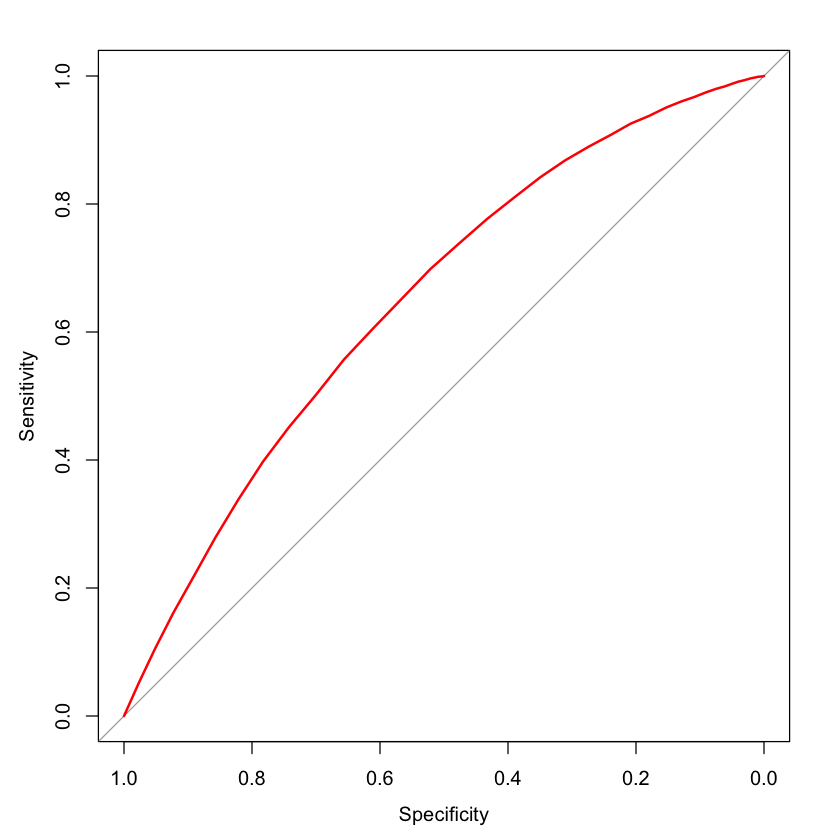

In [111]:
library(pROC,warn.conflict=FALSE)
# Compute AUC for predicting Class with the variable CreditHistory.Critical
f1 = roc(converted ~ age, data=train_data) 
plot(f1, col="red")

#### Random Forecast from Book

In [112]:
rf = randomForest(y=train_data$converted, x = train_data[, -ncol(train_data)],ytest = test_data$converted, xtest = test_data[, -ncol(test_data)],ntree = 100, mtry = 3, keep.forest = TRUE);

In [113]:
rf


Call:
 randomForest(x = train_data[, -ncol(train_data)], y = train_data$converted,      xtest = test_data[, -ncol(test_data)], ytest = test_data$converted,      ntree = 100, mtry = 3, keep.forest = TRUE) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 3

        OOB estimate of  error rate: 1.43%
Confusion matrix:
       0    1 class.error
0 201091  870 0.004307762
1   2122 4607 0.315351464
                Test set error rate: 1.49%
Confusion matrix:
       0    1 class.error
0 103571  468 0.004498313
1   1130 2339 0.325742289

In [114]:
importance(rf)

,MeanDecreaseGini
country,489.7561
age,702.7840
new_user,387.8662
source,188.2903
total_pages_visited,7722.3792


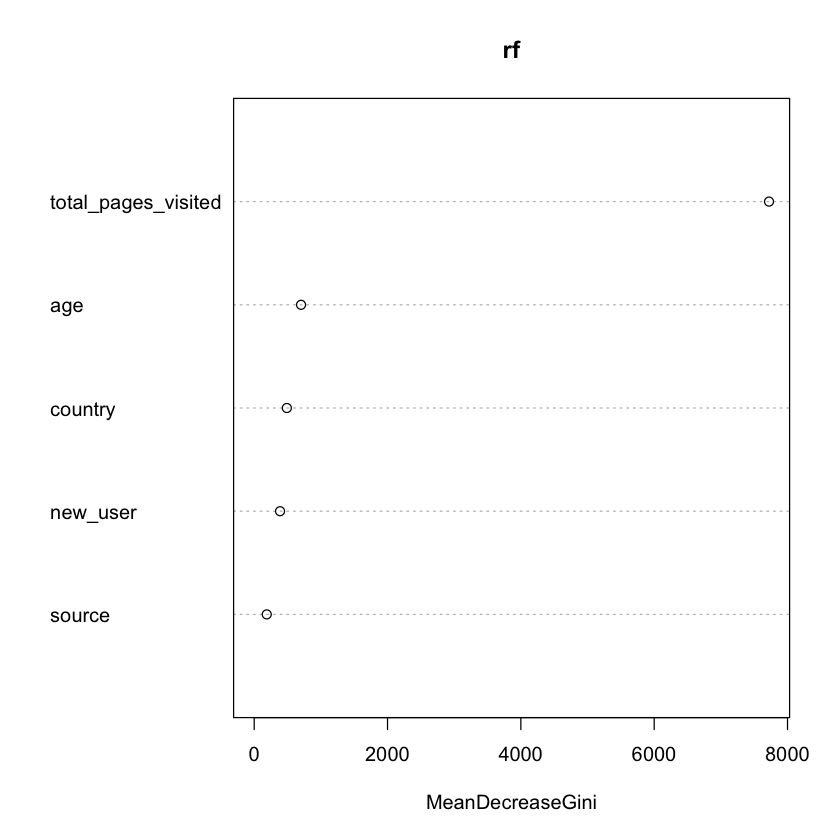

In [115]:
varImpPlot(rf,type=2)

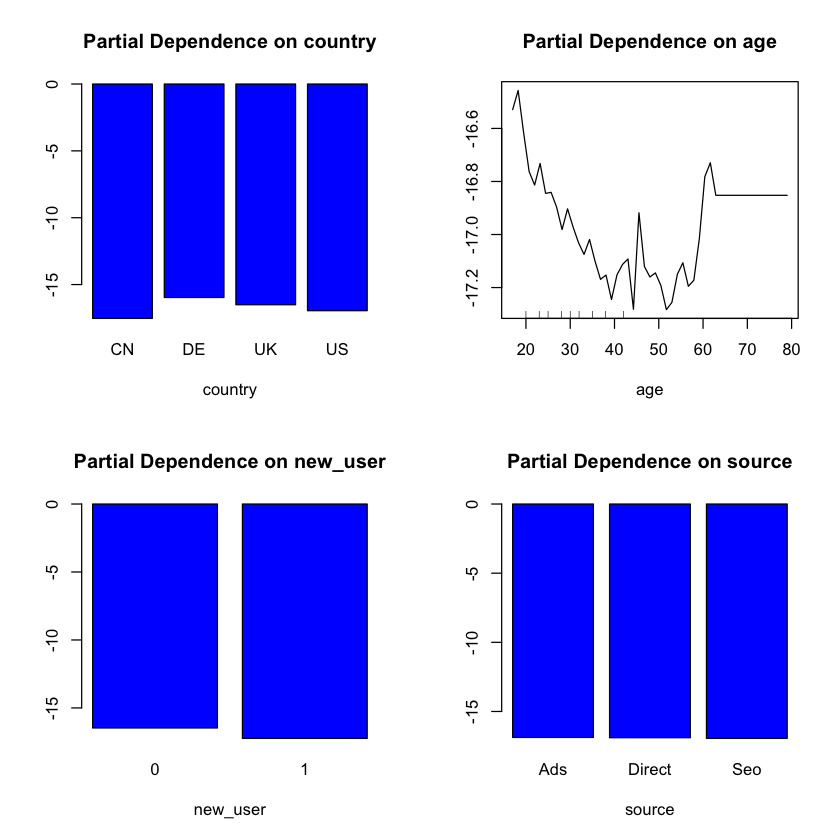

In [116]:
op <- par(mfrow=c(2, 2))
partialPlot(rf, train_data, country, 1)
partialPlot(rf, train_data, age, 1)
partialPlot(rf, train_data, new_user, 1)
partialPlot(rf, train_data, source, 1)

In [117]:
tree = rpart(conversion_data$converted ~ ., conversion_data[, -c(5,ncol(conversion_data))],
control = rpart.control(maxdepth = 3),
parms = list(prior = c(0.7, 0.3))
)
tree

n= 316198 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 316198 94859.4000 0 (0.70000000 0.30000000)  
   2) new_user=1 216744 28268.0600 0 (0.84540048 0.15459952) *
   3) new_user=0 99454 66591.3400 0 (0.50063101 0.49936899)  
     6) country=CN 23094   613.9165 0 (0.96445336 0.03554664) *
     7) country=DE,UK,US 76360 50102.8100 1 (0.43162227 0.56837773)  
      14) age>=29.5 38341 19589.5200 0 (0.57227507 0.42772493) *
      15) age< 29.5 38019 23893.0000 1 (0.33996429 0.66003571) *